# 

# Numpy and Matplotlib

This lecture will introduce NumPy and Matplotlib.
These are two of the most fundamental parts of the scientific python "ecosystem".
Most everything else is built on top of them.

```{admonition} Learning Goals
:class: tip
By the end of this lecture, students should be able to:

1️⃣ Explain C-style (row-major) indexing and identify which dimension varies fastest.

2️⃣ Manipulate multi-dimensional NumPy arrays using indexing, broadcasting, and reductions.

3️⃣ Visualize array data and interpret shapes after transformations.
```

**Numpy**: _The fundamental package for scientific computing with Python_

- Website: <https://numpy.org/>
- GitHub: <https://github.com/numpy/numpy>

**Matlotlib**: _Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python._

- Website: <https://matplotlib.org/>
- GitHub: <https://github.com/matplotlib/matplotlib>

## Importing and Examining a New Package

We will be _importing_ a package which is not part of the Python [standard library](https://docs.python.org/3/library/).

In [1]:
import numpy as np

What did we just do? We _imported_ a package. This brings new variables (mostly functions) into our interpreter. We access them as follows.

In [2]:
# find out what is in our namespace
dir()

['In',
 'Out',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'np',
 'open',
 'quit']

In [3]:
# find out what's in numpy
dir(np)

['False_',
 'ScalarType',
 'True_',
 '_CopyMode',
 '_NoValue',
 '__NUMPY_SETUP__',
 '__all__',
 '__array_api_version__',
 '__array_namespace_info__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__dir__',
 '__doc__',
 '__expired_attributes__',
 '__file__',
 '__former_attrs__',
 '__future_scalars__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__numpy_submodules__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_array_api_info',
 '_core',
 '_distributor_init',
 '_expired_attrs_2_0',
 '_globals',
 '_int_extended_msg',
 '_mat',
 '_msg',
 '_pyinstaller_hooks_dir',
 '_pytesttester',
 '_specific_msg',
 '_type_info',
 '_typing',
 '_utils',
 'abs',
 'absolute',
 'acos',
 'acosh',
 'add',
 'all',
 'allclose',
 'amax',
 'amin',
 'angle',
 'any',
 'append',
 'apply_along_axis',
 'apply_over_axes',
 'arange',
 'arccos',
 'arccosh',
 'arcsin',
 'arcsinh',
 'arctan',
 'arctan2',
 'arctanh',
 'argmax',
 'argmin',
 'argpartition',
 'argsort',
 'argwhere',
 'around',
 'array',
 'arr

In [4]:
# find out what version we have
np.__version__

'2.3.5'

There is no way we could explicitly teach each of these functions. The numpy documentation is crucial!

https://numpy.org/doc/stable/reference/

## NDArrays

The core class is the numpy ndarray (n-dimensional array).

The main difference between a numpy array an a more general data container such as `list` are the following:
- Numpy arrays can have N dimensions (while lists, tuples, etc. only have 1)
- Numpy arrays hold values of the same datatype (e.g. `int`, `float`), while `lists` can contain anything.
- Numpy optimizes numerical operations on arrays. Numpy is _fast!_

In [5]:
from IPython.display import Image
Image(url='http://docs.scipy.org/doc/numpy/_images/threefundamental.png')

Figure Conceptual diagram showing the relationship between the three fundamental objects used to describe the data in an array: 1) the ndarray itself, 2) the data-type object that describes the layout of a single fixed-size element of the array, 3) the array-scalar Python object that is returned when a single element of the array is accessed.

In [6]:
# create an array from a list
a = np.array([9,0,2,1,0])

In [7]:
# find out the datatype
a.dtype

dtype('int64')

In [24]:
# find out the shape
a.shape

(5,)

In [8]:
# what is the shape
type(a.shape)

tuple

In [26]:
# another array with a different datatype and shape
b = np.array([[5,3,1,9],[9,2,3,0]], dtype=np.float64)

# check dtype and shape
b.dtype, b.shape

(dtype('float64'), (2, 4))

```{note}
The fastest varying dimension is the last dimension! The outer level of the hierarchy is the first dimension. (This is called "c-style" indexing)

This means:
Suppose we have an array with shape:

(2, 2, 3)

That means:
- 2 blocks (dimension 0)
- 2 rows per block (dimension 1)
- 3 columns per row (dimension 2)

We index it as:

A[i, j, k]

- i → block (outermost)
- j → row
- k → column (innermost, fastest varying)

---

## Structured View

A = [

  [  # i = 0
    [1, 2, 3],      # j = 0
    [4, 5, 6]       # j = 1
  ],

  [  # i = 1
    [7, 8, 9],      # j = 0
    [10, 11, 12]    # j = 1
  ]

]

---

## Memory Layout (Row-Major / C-Style)

In C-style order, the last dimension (k) changes fastest.

Traversal order:

for i in range(2):
    for j in range(2):
        for k in range(3):
            visit A[i, j, k]

Visited elements in memory:

A[0,0,0] = 1
A[0,0,1] = 2
A[0,0,2] = 3
A[0,1,0] = 4
A[0,1,1] = 5
A[0,1,2] = 6
A[1,0,0] = 7
A[1,0,1] = 8
A[1,0,2] = 9
A[1,1,0] = 10
A[1,1,1] = 11
A[1,1,2] = 12


```

## Array Creation

There are lots of ways to create arrays.

In [8]:
# create some uniform arrays
c = np.zeros((9,9))
d = np.ones((3,6,3), dtype=np.complex128)
e = np.full((3,3), np.pi)  # np.full(shape, fill_value)
f = np.ones_like(c)  # return an array of ones with the same shape and type as a given array
g = np.zeros_like(d)

`arange` works very similar to `range`, but it populates the array "eagerly" (i.e. immediately), rather than generating the values upon iteration.

In [9]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

`arange` is left inclusive, right exclusive, just like `range`, but also works with floating-point numbers.

In [10]:
np.arange(2,4,0.25)  # np.arange(start, stop, step)

array([2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75])

A frequent need is to generate an array of N numbers, evenly spaced between two values. That is what `linspace` is for.

In [11]:
np.linspace(2,4,20)  # np.linspace(start, stop, num)

array([2.        , 2.10526316, 2.21052632, 2.31578947, 2.42105263,
       2.52631579, 2.63157895, 2.73684211, 2.84210526, 2.94736842,
       3.05263158, 3.15789474, 3.26315789, 3.36842105, 3.47368421,
       3.57894737, 3.68421053, 3.78947368, 3.89473684, 4.        ])

In [12]:
# log spaced
np.logspace(1,2,10)  # base ** start (base to the power of start) is the starting value of the sequence

array([ 10.        ,  12.91549665,  16.68100537,  21.5443469 ,
        27.82559402,  35.93813664,  46.41588834,  59.94842503,
        77.42636827, 100.        ])

Numpy also has some utilities for helping us generate multi-dimensional arrays.
`meshgrid` creates 2D arrays out of a combination of 1D arrays.

In [13]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape

((50, 100), (50, 100))

## Indexing

Basic indexing is similar to lists

In [14]:
# get some individual elements of xx
xx[0,0], xx[-1,-1], xx[3,-5]

(np.float64(-6.283185307179586),
 np.float64(6.283185307179586),
 np.float64(5.775453161144872))

In [15]:
# get some whole rows and columns
xx[0].shape, xx[:,-1].shape

((100,), (50,))

In [16]:
# get some ranges
xx[3:10,30:40].shape

(7, 10)

There are many advanced ways to index arrays. You can [read about them](https://numpy.org/doc/stable/reference/arrays.indexing.html) in the manual. Here is one example.

In [17]:
# use a boolean array as an index
idx = xx<0
yy[idx].shape

(2500,)

In [18]:
# the array got flattened
xx.ravel().shape  # ravel: the elements are read in the order specified by order, and packed as a 1-D array

(5000,)

In [19]:
#  equivalently
np.ravel(xx).shape

(5000,)

## Visualizing Arrays with Matplotlib

It can be hard to work with big arrays without actually seeing anything with our eyes!
We will now bring in Matplotib to start visualizating these arrays.
For now we will just skim the surface of Matplotlib.
Much more depth will be provided in the next chapter.

In [20]:
from matplotlib import pyplot as plt

For plotting a 1D array as a line, we use the `plot` command.

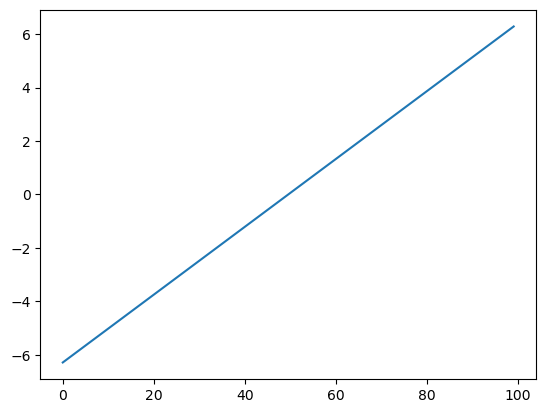

In [21]:
plt.plot(x)

There are many ways to visualize 2D data.
He we use `pcolormesh`.

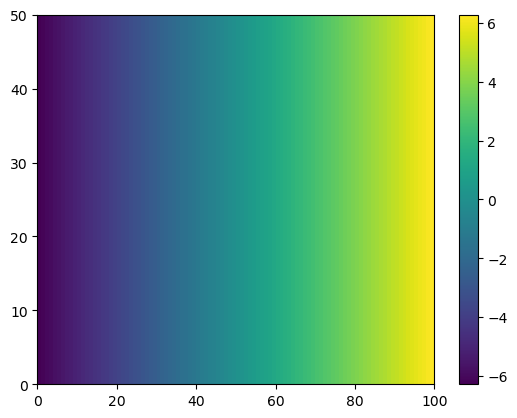

In [22]:
plt.pcolormesh(xx)
plt.colorbar()

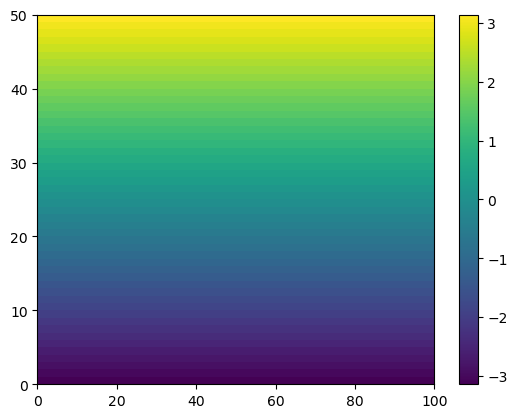

In [23]:
plt.pcolormesh(yy)
plt.colorbar()

## Array Operations ##

There are a huge number of operations available on arrays. All the familiar arithemtic operators are applied on an element-by-element basis.

### Basic Math

In [24]:
f = np.sin(xx) * np.cos(0.5*yy)  #  element-by-element multiplication

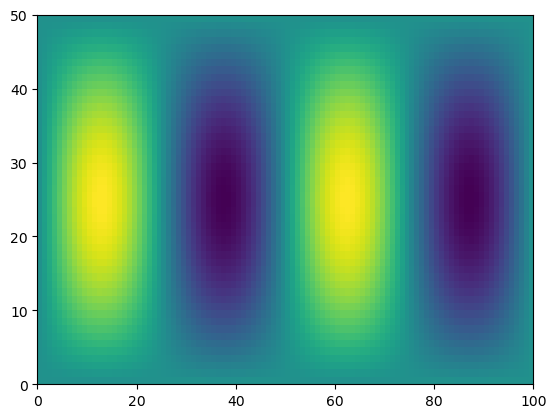

In [25]:
plt.pcolormesh(f)

## Manipulating array dimensions ##

Swapping the dimension order is accomplished by calling `transpose`.

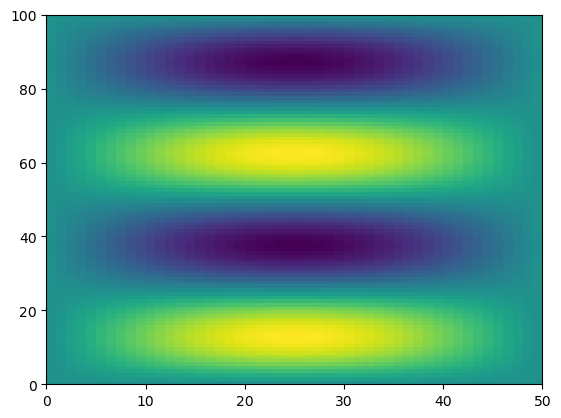

In [26]:
f_transposed = f.transpose()
plt.pcolormesh(f_transposed)

We can also manually change the shape of an array...as long as the new shape has the same number of elements.

In [27]:
g = np.reshape(f, (8,9))

ValueError: cannot reshape array of size 5000 into shape (8,9)

However, be careful with reshapeing data!
You can accidentally lose the structure of the data.

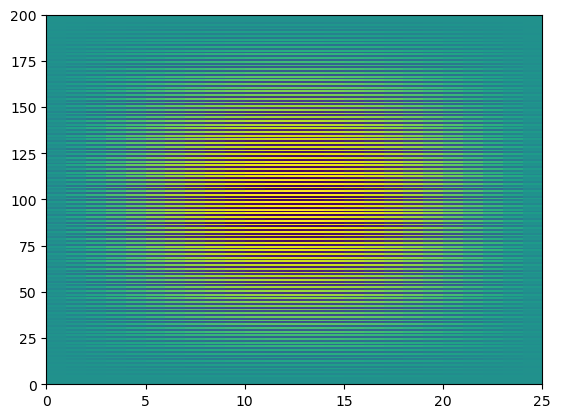

In [28]:
g = np.reshape(f, (200,25))
plt.pcolormesh(g)

We can also "tile" an array to repeat it many times.

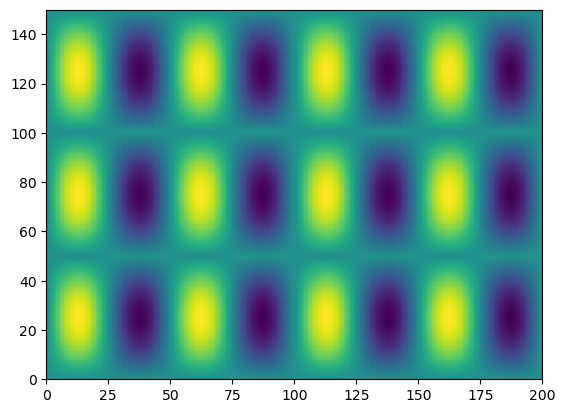

In [29]:
f_tiled = np.tile(f,(3, 2))
plt.pcolormesh(f_tiled)

Another common need is to add an extra dimension to an array.
This can be accomplished via indexing with `None`.

In [30]:
x.shape

(100,)

In [31]:
x[None, :].shape

(1, 100)

In [32]:
x[np.newaxis, :].shape  #  np.newaxis would work too

(1, 100)

In [33]:
x[None, :, None, None].shape

(1, 100, 1, 1)

## Broadcasting


Not all the arrays we want to work with will have the same size.
One approach would be to manually "expand" our arrays to all be the same size, e.g. using `tile`.
_Broadcasting_ is a more efficient way to multiply arrays of different sizes
Numpy has specific rules for how broadcasting works.
These can be confusing but are worth learning if you plan to work with Numpy data a lot.

The core concept of broadcasting is telling Numpy which dimensions are supposed to line up with each other.

In [34]:
Image(url='http://scipy-lectures.github.io/_images/numpy_broadcasting.png',
     width=720)

Dimensions are automatically aligned _starting with the last dimension_.
If the last two dimensions have the same length, then the two arrays can be broadcast.

In [35]:
print(f.shape, x.shape)  #  x 1-by-100
g = f * x
print(g.shape)

(50, 100) (100,)
(50, 100)


Note that `a * b` is a multiplication operator - it will return elements in a multiplied by elements in b. `a @ b` is matrix multiplication (dot product when used with vectors).

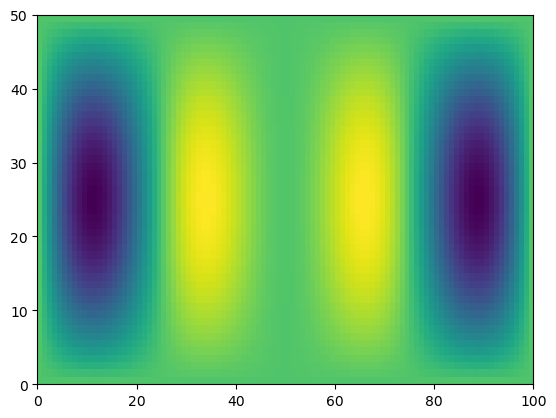

In [36]:
plt.pcolormesh(g)

However, if the last two dimensions are _not_ the same, Numpy cannot just automatically figure it out.

In [37]:
# multiply f by y
print(f.shape, y.shape)  #  y is 1-by-50
h = f * y

(50, 100) (50,)


ValueError: operands could not be broadcast together with shapes (50,100) (50,) 

We can help numpy by adding an extra dimension to `y` at the end.
Then the length-50 dimensions will line up.

In [38]:
print(f.shape, y[:, None].shape)  #  y[:, np.newaxis] would work too
h = f * y[:, None]
print(h.shape)

(50, 100) (50, 1)
(50, 100)


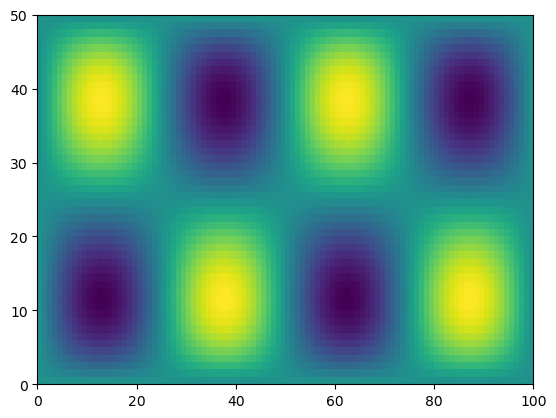

In [39]:
plt.pcolormesh(h)

## Reduction Operations

In scientific data analysis, we usually start with a lot of data and want to reduce it down in order to make plots of summary tables.
Operations that reduce the size of numpy arrays are called "reductions".
There are many different reduction operations. Here we will look at some of the most common ones.

In [40]:
# sum
g.sum()

np.float64(-3083.038387807155)

In [41]:
# mean
g.mean()

np.float64(-0.616607677561431)

In [42]:
# standard deviation
g.std()

np.float64(1.6402280119141424)

A key property of numpy reductions is the ability to operate on just one axis.

In [43]:
# apply on just one axis
g_ymean = g.mean(axis=0)
g_xmean = g.mean(axis=1)

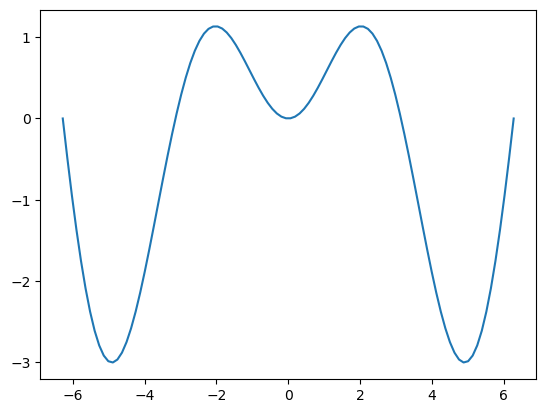

In [44]:
plt.plot(x, g_ymean)

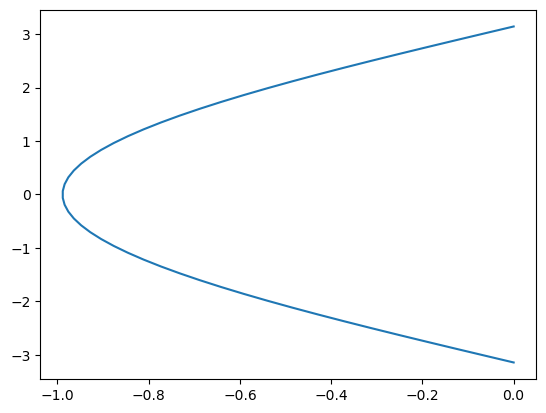

In [45]:
plt.plot(g_xmean, y)

## Data Files

It can be useful to save numpy data into files.

In [46]:
np.save('g.npy', g)

```{warning}
Numpy `.npy` files are a convenient way to store temporary data, but they are not considered a robust archival format.
Later we will learn about NetCDF, the recommended way to store earth and environmental data.
```

In [47]:
g_loaded = np.load('g.npy')

np.testing.assert_equal(g, g_loaded)  #  raises an AssertionError if two objects are not equal

# 💻 In-Class Coding Activity: Build and Analyze a 3D Dataset

## 🎯 Learning Goals

By the end of this activity, you should be able to:

- Work with 3D NumPy arrays
- Understand C-style (row-major) indexing
- Apply broadcasting correctly
- Perform reductions across axes
- Visualize results with Matplotlib

---

# 🧪 Scenario

We are measuring temperature in a building:

- 5 floors  
- 4 rooms per floor  
- 10 time measurements  

This gives us a dataset with shape:

(5, 4, 10)

Meaning:

- dimension 0 → floor  
- dimension 1 → room  
- dimension 2 → time  

Remember:

**In C-style indexing, the last dimension varies fastest.**

---

# 🔹 Part 1 — Create the Dataset

Run:

In [49]:
# floors, rooms, time
data = np.random.normal(loc=20, scale=2, size=(5, 4, 10))

print("Shape:", data.shape)

Shape: (5, 4, 10)


### Questions

Which dimension varies fastest in memory?

If you wrote nested loops to traverse this in memory order, which index would be the innermost loop?

# 🔹 Part 2 — Indexing Practice

Write code to answer the following:

---

## 1️⃣ Get all measurements from:
- Floor 2  
- Room 1  

(Hint: Think about which indices stay fixed and which should vary.)

---

## 2️⃣ Compute the average temperature of:
- Floor 3 across all rooms and times  

Questions:
- Which axis (or axes) are you reducing?
- What shape do you expect the result to have?

---

## 3️⃣ Compute the average temperature at:
- Time step 5 across the entire building  

Questions:
- Which axis corresponds to time?
- What dimensions remain after the reduction?

---
  

# 🔹 Part 3 — Broadcasting

Each floor has a calibration offset:

In [ ]:
offsets = np.array([0.5, -0.2, 0.1, 0.0, -0.3])

## Task

Add this offset to every room and time measurement on each floor.

Questions:

1. Why can’t you directly add `offsets` to `data`?
2. What shape must `offsets` have to broadcast correctly?
3. Which axes need to align?
4. Which dimension varies fastest in memory — does broadcasting affect that?

---

# 🔹 Part 4 — Reduction + Visualization

## 1️⃣ Compute the average temperature over time.

- Reduce along the time axis.
- What is the resulting shape?
- Why?

## 2️⃣ Visualize the result.

Use:

In [ ]:
plt.imshow(...)
plt.colorbar()
plt.title("Average Temperature per Floor and Room")
plt.xlabel("Room")
plt.ylabel("Floor")
plt.show()

Questions:

- What does each axis represent?
- Why does the shape make sense for visualization?
- What happens if you swap axes before plotting?

---

# 🧠 Reflection

- How did reducing along an axis change the array shape?
- How did broadcasting determine which dimensions aligned?
- In this example, which dimension varies fastest in memory?